In [1]:
import pandas as pd

#K-Means 라이브러리
from sklearn.cluster import KMeans

#시각화 라이브러리
import matplotlib.pyplot as plt

#Only needed if you want to display your plots inline using Notebook
## change inline to auto if you have Spyder installed
%matplotlib inline

In [3]:
# CSV파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("./dataset/student_middle.csv")

In [4]:
studentData.head()

,NAME,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20


## 2. 데이터 분리

In [5]:
# 기본정보 가지고 있기
name = studentData[["NAME"]]

# 특성정보 분리
features = studentData[["SW", "DB", "AND"]]

##  3. 모델선언 및 자율학습 예측

In [14]:
# 모델선언 및 feature만 활용하여 자율학습 예측
model = KMeans(n_clusters=3, algorithm="auto") ##clusters는 중심이고, 숫자 설정해준거는 중심 갯수(분류 갯수)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## 4. 데이터 정리

In [15]:
predict = pd.DataFrame(model.predict(features))
predict.columns = ["PREDICT"]

In [19]:
# name, feature, predict 붙이기
result = pd.concat([name, features, predict], axis = 1)
result

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,0
1,ST0002,50,50,0,2
2,ST0003,15,30,15,2
3,ST0004,90,50,20,0
4,ST0005,75,20,20,0
5,ST0006,100,80,30,0
6,ST0007,15,10,30,2
7,ST0008,100,100,33,1
8,ST0009,65,60,35,0
9,ST0010,90,20,38,0


## 5. 시각화

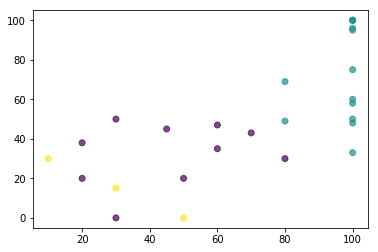

In [17]:
plt.scatter(result['DB'],result["AND"], c=result["PREDICT"], alpha=0.7)